<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day5_News_Headline_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept**

This project focuses on text generation, specifically creating a system that can generate headlines based on article content.

**implementation:**










*   **Data Collection:** You'll need a dataset of news articles with headlines
*  **Text Processing:** Clean and prepare the article content


*   **Model Selection:** Choose an approach for headline generation (Markov chains or Transformers)
*  **Implementation:** Build and train your headline generator


*   **Evaluation:** Test your model and select interesting examples
Ethical Considerations: Reflect on misinformation risks
  

*   **Ethical Considerations:** Reflect on misinformation risks











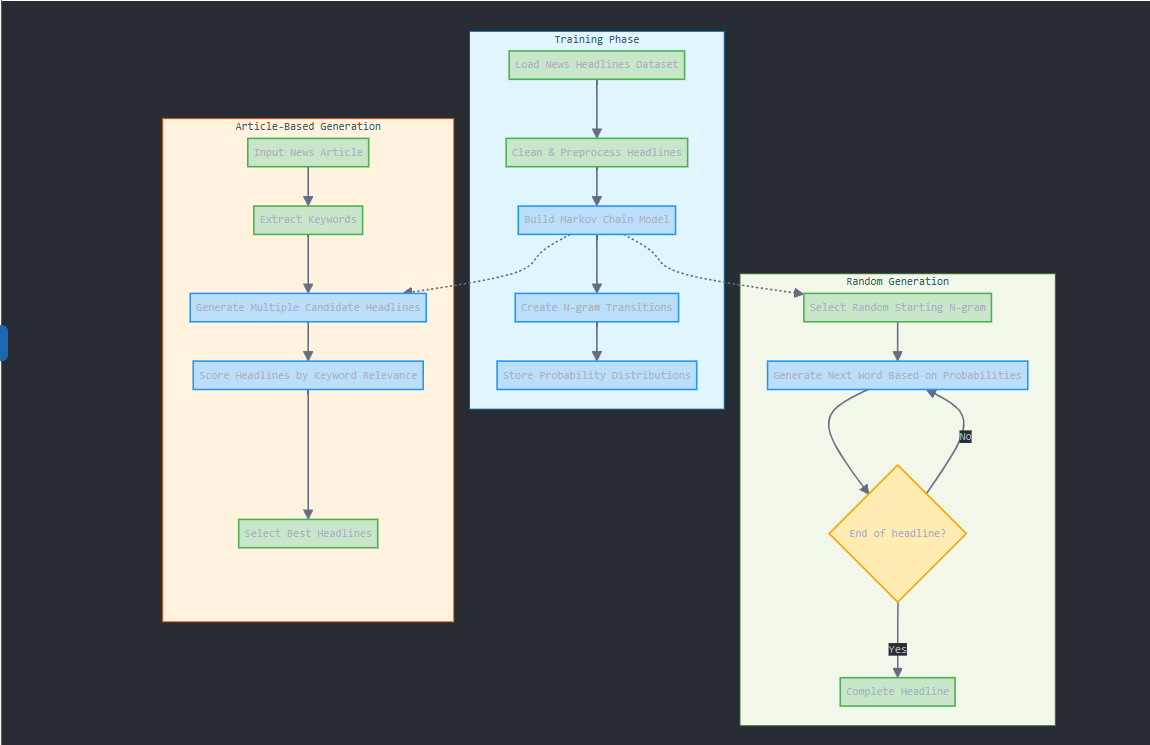

#**Here we used second option with markov chain model**

**project environment**

In [1]:
# Set up libraries
!pip install nltk
!pip install matplotlib seaborn

import nltk
import re
import random
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from nltk.tokenize import word_tokenize, sent_tokenize

# Download NLTK resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Get a news headlines dataset**

**Use a pre-existing dataset from Kaggle like "News Headlines Dataset For Sarcasm Detection**"

In [2]:
# Download the Sarcasm Headlines Dataset
!wget https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json

# Load the dataset
headlines = []
with open('Sarcasm_Headlines_Dataset.json', 'r') as f:
    for line in f:
        headline_data = json.loads(line)
        headlines.append(headline_data['headline'])

print(f"Loaded {len(headlines)} headlines")
print("Sample headlines:")
for i in range(5):
    print(f"- {headlines[i]}")

--2025-04-19 23:44:07--  https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6057046 (5.8M) [text/plain]
Saving to: ‘Sarcasm_Headlines_Dataset.json’

Sarcasm_Headlines_D 100%[===================>]   5.78M  --.-KB/s    in 0.05s   

2025-04-19 23:44:08 (106 MB/s) - ‘Sarcasm_Headlines_Dataset.json’ saved [6057046/6057046]

Loaded 28619 headlines
Sample headlines:
- thirtysomething scientists unveil doomsday clock of hair loss
- dem rep. totally nails why congress is falling short on gender, racial equality
- eat your veggies: 9 deliciously different recipes
- inclement weather prevents liar from getting to work
- mother comes pretty clos

**Build the Markov Chain Model**

In [3]:
class MarkovHeadlineGenerator:
    def __init__(self, headlines, n=2):
        self.n = n  # n-gram size
        self.headlines = headlines
        self.model = defaultdict(list)
        self.build_model()

    def build_model(self):
        """Build n-gram Markov model from headlines"""
        for headline in self.headlines:
            # Clean headline
            headline = headline.strip()
            words = headline.split()

            # Skip very short headlines
            if len(words) < self.n + 1:
                continue

            # Build n-grams
            for i in range(len(words) - self.n):
                gram = tuple(words[i:i+self.n])
                next_word = words[i+self.n]
                self.model[gram].append(next_word)

        print(f"Built model with {len(self.model)} n-gram states")

    def generate_headline(self, max_length=15):
        """Generate a headline using the Markov model"""
        # Get random starting gram
        current_gram = random.choice(list(self.model.keys()))
        result = list(current_gram)

        # Generate headline word by word
        for _ in range(max_length - self.n):
            if current_gram not in self.model:
                break

            # Get possible next words and select one
            possible_next_words = self.model[current_gram]
            next_word = random.choice(possible_next_words)
            result.append(next_word)

            # Update current gram
            current_gram = tuple(result[-self.n:])

        return ' '.join(result)

    def generate_headlines(self, count=10):
        """Generate multiple headlines"""
        return [self.generate_headline() for _ in range(count)]

**Implement article-based headline generation**

In [10]:
# Download required resources
nltk.download('stopwords')
nltk.download('punkt')

def extract_keywords(article, n=5):
    """Extract important keywords from article text"""
    # Clean and tokenize
    words = word_tokenize(article.lower())

    # Filter stop words and short words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 3]

    # Count frequencies and weight by length (longer words often more significant)
    word_scores = {}
    for word in words:
        # Basic TF score with length bonus
        word_scores[word] = word_scores.get(word, 0) + 1 + (len(word) / 10)

    # Get top N words
    top_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:n]
    return [word for word, _ in top_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**headline style analyzer**

In [12]:
def analyze_headline_style(headlines):
    """Analyze headline characteristics"""
    style_patterns = {
        'questions': 0,  # Headlines ending with ?
        'numbers': 0,    # Headlines containing numbers
        'action_verbs': 0,  # Headlines with active verbs
        'keyword_counts': defaultdict(int)  # Common words
    }

    action_verbs = ['says', 'reveals', 'announces', 'launches', 'warns',
                   'claims', 'reports', 'unveils', 'introduces', 'discovers']

    for headline in headlines:
        # Check for questions
        if headline.endswith('?'):
            style_patterns['questions'] += 1

        # Check for numbers
        if any(c.isdigit() for c in headline):
            style_patterns['numbers'] += 1

        # Check for action verbs
        if any(verb in headline.lower() for verb in action_verbs):
            style_patterns['action_verbs'] += 1

        # Count keywords
        for word in headline.lower().split():
            if len(word) > 3:  # Skip short words
                style_patterns['keyword_counts'][word] += 1

    # Calculate percentages
    total = len(headlines)
    print(f"Headline Style Analysis (from {total} headlines):")
    print(f"Questions: {style_patterns['questions']} ({style_patterns['questions']/total:.1%})")
    print(f"Headlines with numbers: {style_patterns['numbers']} ({style_patterns['numbers']/total:.1%})")
    print(f"Headlines with action verbs: {style_patterns['action_verbs']} ({style_patterns['action_verbs']/total:.1%})")

    # Top keywords
    top_keywords = sorted(style_patterns['keyword_counts'].items(), key=lambda x: x[1], reverse=True)[:10]
    print("Top 10 keywords:")
    for word, count in top_keywords:
        print(f"- {word}: {count} ({count/total:.1%})")

    return style_patterns

**Adding Visualizations**

**Let's plot hiostogram**

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# Simple headline length visualization
def visualize_headline_lengths(headlines, generated_headlines):
    # Calculate lengths
    original_lengths = [len(h.split()) for h in headlines[:1000]]  # Use subset
    generated_lengths = [len(h.split()) for h in generated_headlines]

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot histograms
    plt.hist(original_lengths, alpha=0.5, label='Original Headlines', bins=15, color='blue')
    plt.hist(generated_lengths, alpha=0.5, label='Generated Headlines', bins=15, color='red')

    # Add labels and legend
    plt.title('Headline Length Comparison')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend()

    # Display plot
    plt.grid(alpha=0.3)
    plt.show()



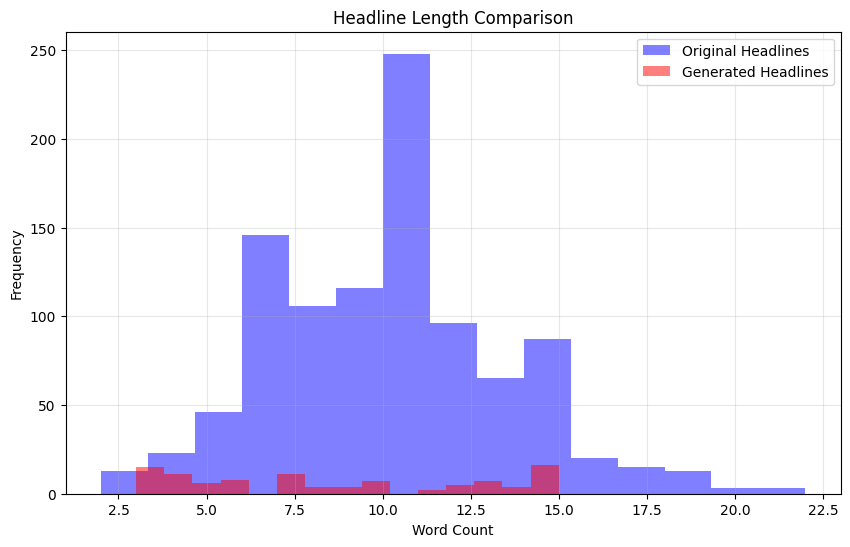

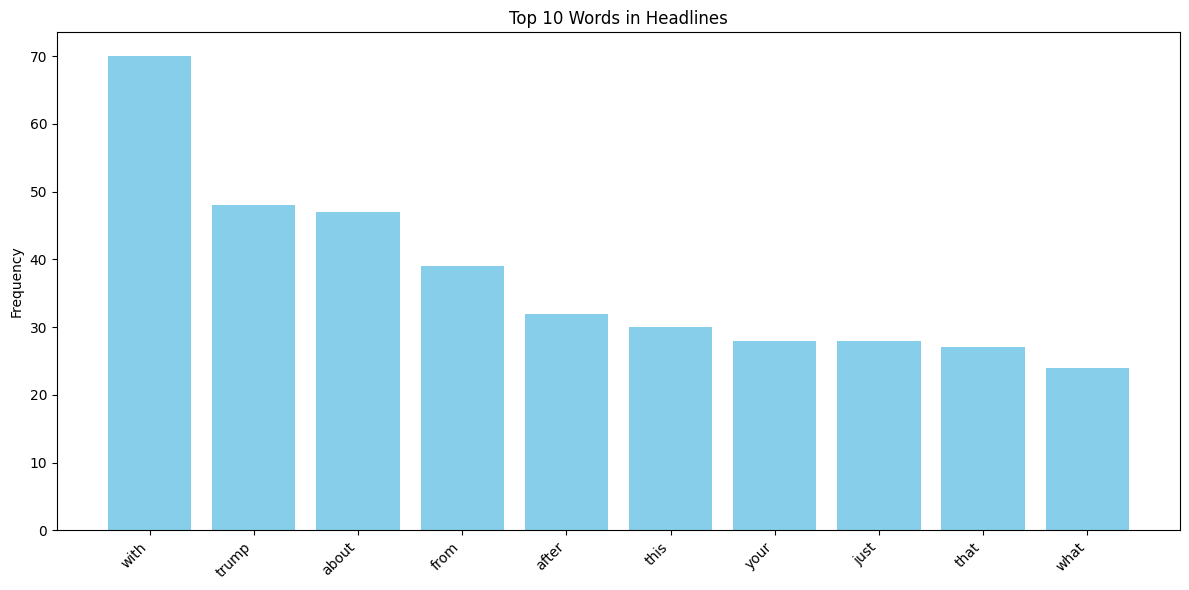

In [33]:
# Simple bar chart for top words
def visualize_top_words(headlines, n=10):
    # Count word frequencies
    word_counts = {}
    for headline in headlines[:1000]:  # Use subset
        for word in headline.lower().split():
            if len(word) > 3:  # Skip short words
                word_counts[word] = word_counts.get(word, 0) + 1

    # Get top N words
    top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:n]
    words = [w[0] for w in top_words]
    counts = [w[1] for w in top_words]

    # Create bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {n} Words in Headlines')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Run visualizations
# Assuming generator and headlines are defined
generated_headlines = generator.generate_headlines(100)
visualize_headline_lengths(headlines, generated_headlines)
visualize_top_words(headlines)